In [44]:
import pandas as pd
import numpy as np
import random as rnd

# Visualization 

import seaborn as sns
import matplotlib.pyplot as plt

# scaling and train test split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Create a Model
import tensorflow 
from tensorflow import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from keras.optimizers import Adam



# evaluation on test data

from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score
from sklearn.metrics import classification_report, confusion_matrix


In [36]:
df = pd.read_csv('../Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
new_df = df.drop('date', axis=1)

<Axes: title={'center': 'Person Correlation matrix'}>

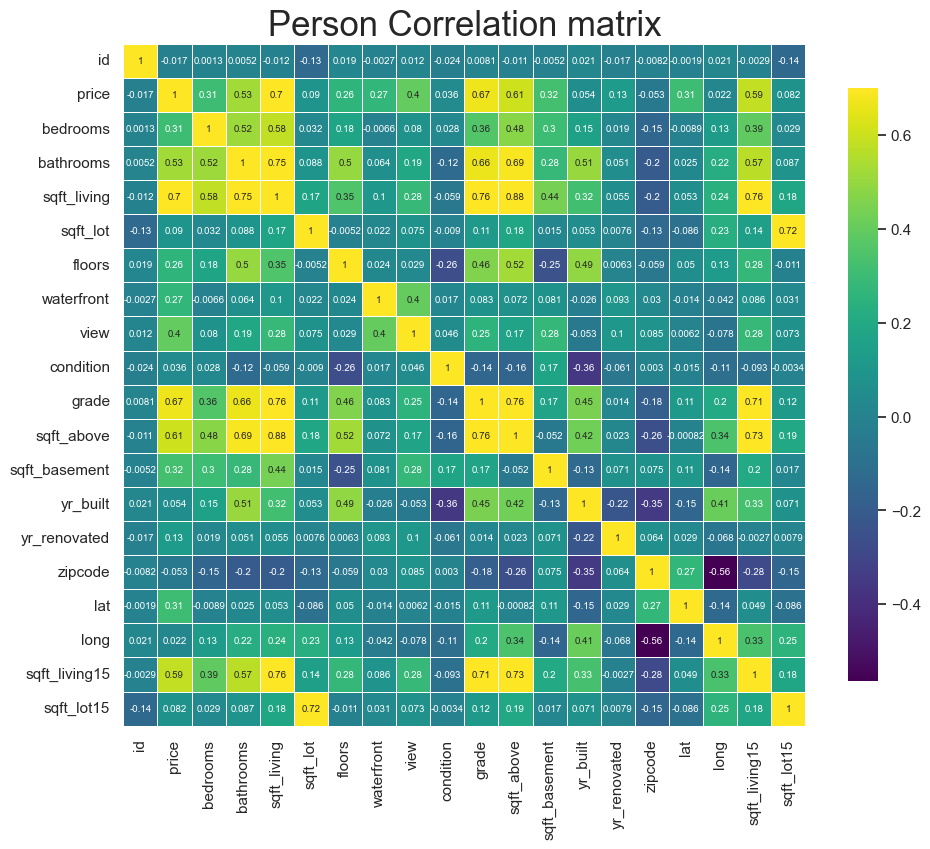

In [8]:
sns.set_theme(style= "darkgrid", font_scale = 1)
plt.figure(figsize=(11,11))

plt.title('Person Correlation matrix', fontsize = 25)

sns.heatmap(new_df.corr(),linewidths=0.58,vmax=0.7, square=True, cmap="viridis", linecolor='w',annot = True, annot_kws={'size' :7}, cbar_kws={"shrink":.7})

In [ ]:
price_corr = new_df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


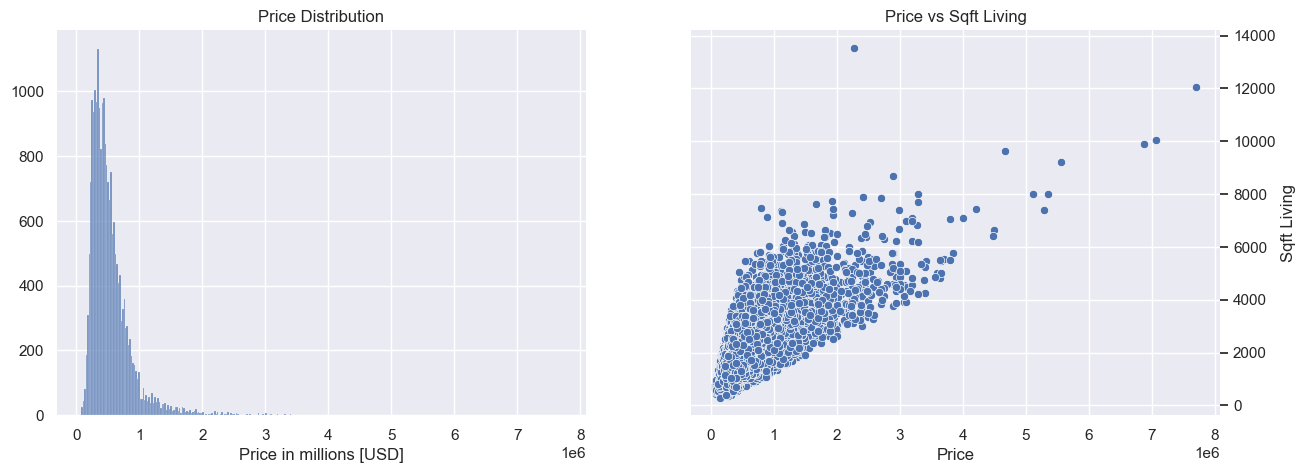

In [13]:
f, axes = plt.subplots(1,2,figsize = (15,5))
sns.histplot(df['price'], ax = axes[0])
sns.scatterplot(x = "price", y = 'sqft_living', data = new_df, ax = axes[1])
sns.despine(bottom=True, left=True)

axes[0].set(xlabel = 'Price in millions [USD]', ylabel = '', title = 'Price Distribution')
axes[1].set(xlabel= 'Price', ylabel = 'Sqft Living', title = 'Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price')]

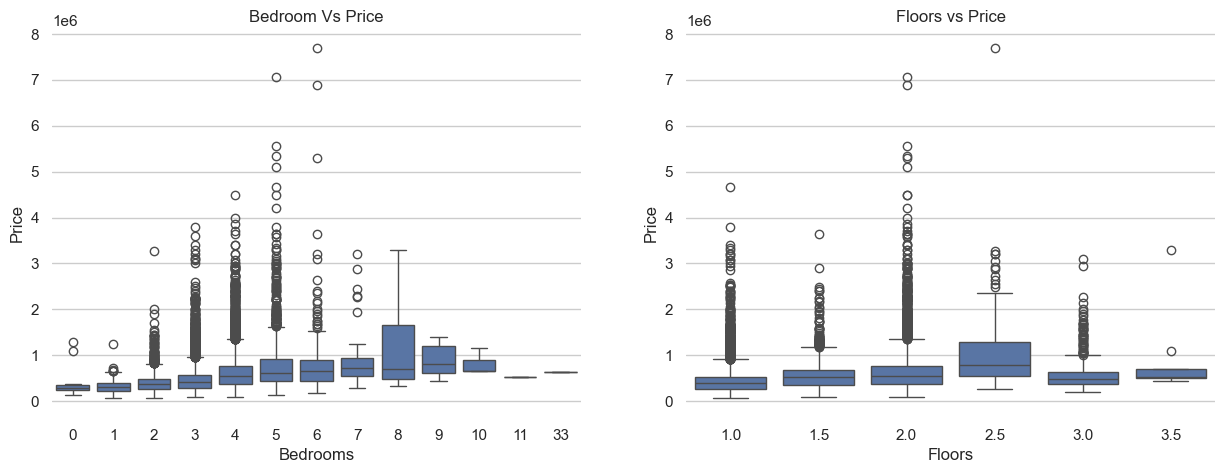

In [14]:
sns.set_theme(style = "whitegrid", font_scale=1)

f, axes = plt.subplots(1,2,figsize = (15,5))

sns.boxplot(x = df['bedrooms'] ,y = df['price'], ax = axes[0])
sns.boxplot(x = df['floors'], y = df['price'], ax = axes[1])

sns.despine(bottom=True, left=True)

axes[0].set(xlabel = 'Bedrooms', ylabel = 'Price', title = 'Bedroom Vs Price')
axes[1].set(xlabel = 'Floors', ylabel = 'Price', title = 'Floors vs Price')


[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade Vs Price')]

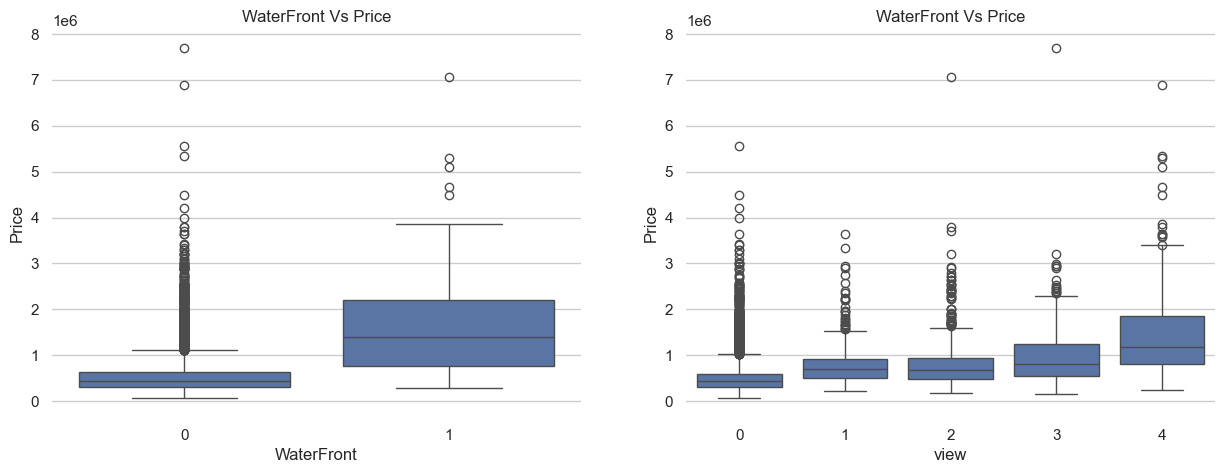

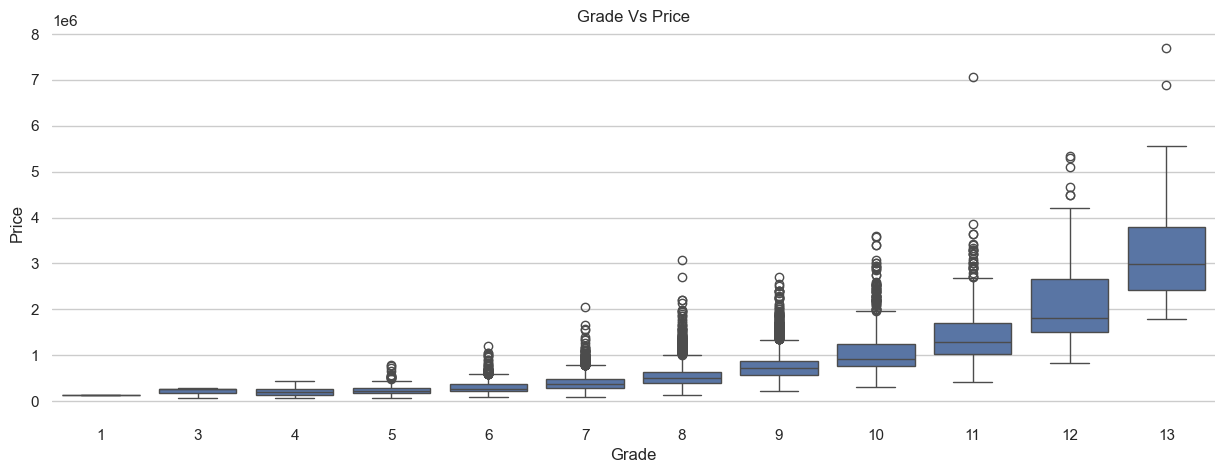

In [17]:
f, axes = plt.subplots(1,2,figsize= (15, 5))

sns.boxplot(x = df['waterfront'], y = df['price'], ax = axes[0])
sns.boxplot(x = df['view'], y = df['price'], ax = axes[1])

sns.despine(bottom=True, left=True)

axes[0].set(xlabel = 'WaterFront', ylabel = 'Price', title = 'WaterFront Vs Price')
axes[1].set(xlabel = 'view', ylabel = 'Price', title = 'WaterFront Vs Price')

f, axes = plt.subplots(1,1, figsize = (15,5))

sns.boxplot(x = df['grade'], y = df['price'], ax = axes)
sns.despine(bottom=True, left=True)
axes.set(xlabel = 'Grade', ylabel = 'Price', title = 'Grade Vs Price')

In [37]:
df = df.drop('id', axis = 1)
df = df.drop('zipcode', axis = 1)

In [38]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date', axis = 1)

print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Price by Month Box Plot')]

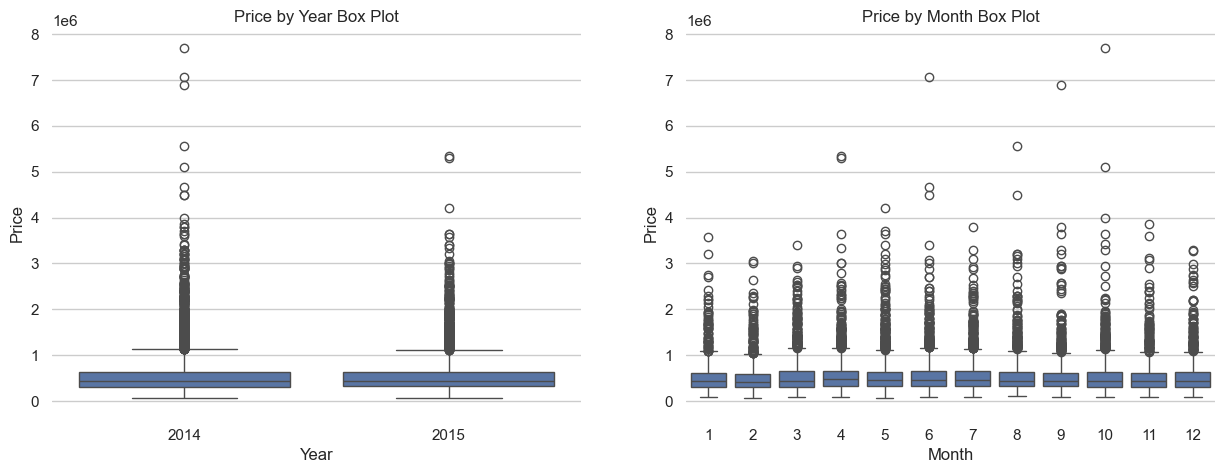

In [39]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Month Vs Price')]

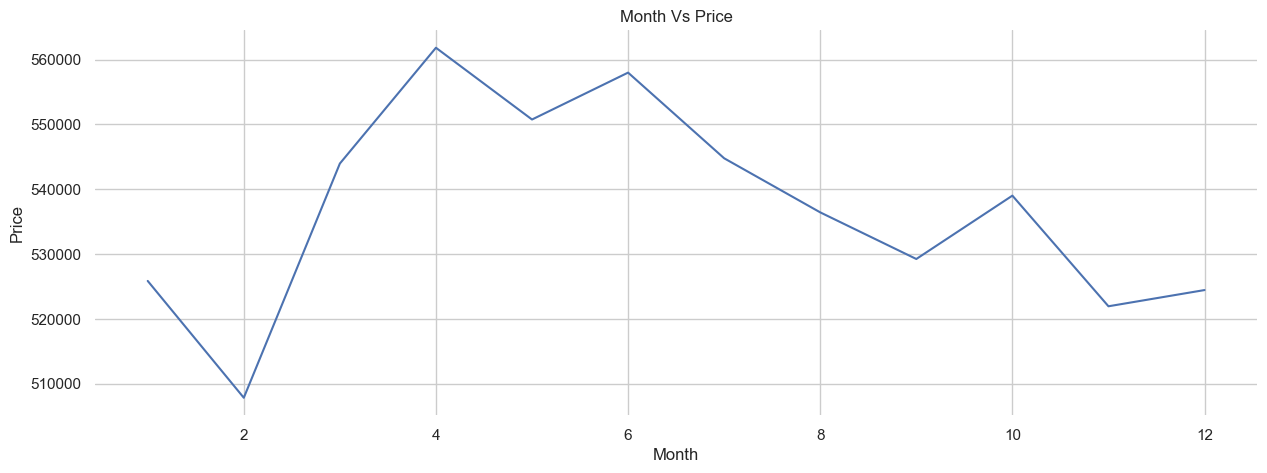

In [40]:
f, axes = plt.subplots(1,1,figsize = (15,5))
df.groupby('month').mean()['price'].plot()

sns.despine(left=True, bottom=True)
axes.set(xlabel = 'Month', ylabel = 'Price', title = "Month Vs Price")

In [42]:
X = df.drop('price', axis = 1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.3)

X_train.shape

(15129, 19)

In [43]:
scalar = MinMaxScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

print("max : ", X_train.max())
print("Min : ", X_train.min())

max :  1.0
Min :  0.0


In [49]:
model = Sequential()

model.add(Dense(19, activation='relu'))


model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))


model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')



In [51]:
from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

In [52]:
model.fit(x = X_train, y = y_train.values, validation_data = (X_test, y_test.values), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 2s 3ms/step - loss: 426126573568.0000 - val_loss: 427147001856.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 424702869504.0000 - val_loss: 422159876096.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 405388001280.0000 - val_loss: 378355417088.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 315805302784.0000 - val_loss: 237648805888.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 161004290048.0000 - val_loss: 112576413696.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100279009280.0000 - val_loss: 101412651008.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 96637370368.0000 - val_loss: 99606396928.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94942175232.0000 - val_loss: 97820475392.0000
Epoch 9/400
119/119 

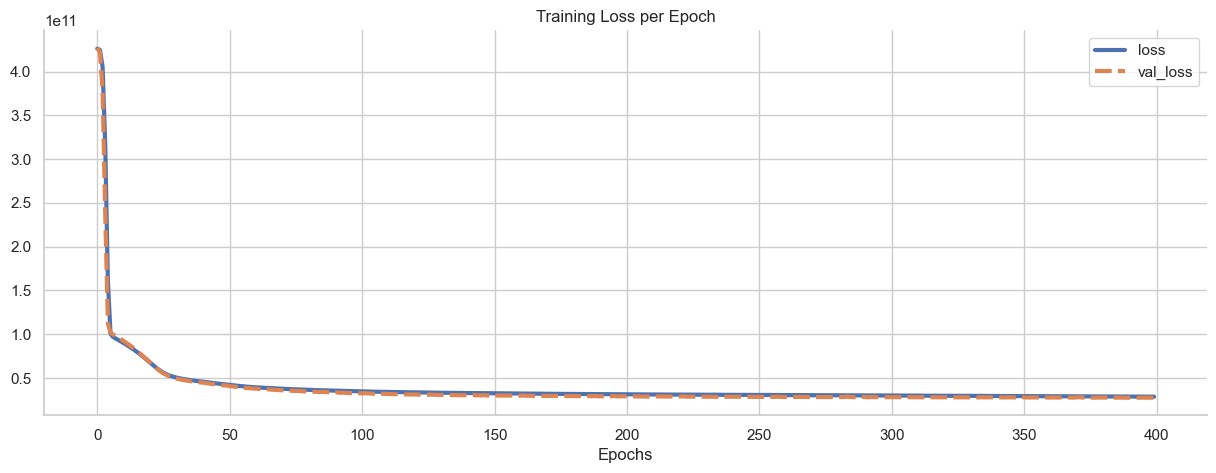

In [53]:
losses = pd.DataFrame(model.history.history)


plt.figure(figsize=(15,5))
sns.lineplot(data = losses, lw = 3)

plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [54]:
predict = model.predict(X_test)

print("MAE", mean_absolute_error(y_test, predict))
print("MSE", mean_squared_error(y_test, predict))
print("RMSE", np.sqrt(mean_squared_error(y_test, predict)))
print('Variance Regression Score: ', explained_variance_score(y_test, predict))

MAE 101632.09386687423
MSE 27453070503.915394
RMSE 165689.6813441181
Variance Regression Score:  0.801284301808078
